In [1]:
import pandas as pd
from pprint import pprint
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


In [2]:


dirs = ['R1398','R1399','R1400','R1401','U1398','U1399','U1400','U1401']

dir = dirs[2]
total_df=pd.read_csv(f'../{dir}/clus_data/{dir}_total.csv')
def f(col1,col2):
    return col1/col2

# total_df['total_income']=total_df.apply(lambda x :f(x.total_income,x.member),axis=1)
# total_df['total_cost']=total_df.apply(lambda x :f(x.total_cost,x.member),axis=1)

# total_df['total_income']=total_df['total_income']/1000000
# total_df['total_cost']=total_df['total_cost']/1000000
# total_df['total']=total_df.iloc[:,1:].sum(axis=1)


# total_df['total_income'] = np.log2(total_df['total_income'])
# total_df['total_cost'] = np.log2(total_df['total_cost'])


# total_df=total_df.iloc[:, [1, 3]]
total_df=total_df.iloc[:,1:]
total_df[total_df.isnull().any(axis=1)]
total_df_corr =total_df
total_df=total_df[['member','Male_count','Female_count','age','literacy','vehicle','motorcycle','facilities','total_cost','total_income']]

In [3]:
total_df.columns


Index(['member', 'Male_count', 'Female_count', 'age', 'literacy', 'vehicle',
       'motorcycle', 'facilities', 'total_cost', 'total_income'],
      dtype='object')

**Robust scaler**

In [4]:
from sklearn.preprocessing import RobustScaler

rbs_data_scaled = RobustScaler(with_centering = True, with_scaling = True).fit_transform(total_df)



**elbow rbs**

within cluster sum of squared distance for k=2:  179896.92420180986
within cluster sum of squared distance for k=3:  150763.95765174617
within cluster sum of squared distance for k=4:  126735.15745108483
within cluster sum of squared distance for k=5:  117778.19334400125
within cluster sum of squared distance for k=6:  104410.7650628309
within cluster sum of squared distance for k=7:  87127.99673935717
within cluster sum of squared distance for k=8:  79785.31710372417
within cluster sum of squared distance for k=9:  74439.12051943652
within cluster sum of squared distance for k=10:  68185.39732715176
within cluster sum of squared distance for k=11:  64923.790912858
within cluster sum of squared distance for k=12:  61790.04377455037
within cluster sum of squared distance for k=13:  58553.8156792609
within cluster sum of squared distance for k=14:  56796.41015412771
within cluster sum of squared distance for k=15:  54589.60574074847
within cluster sum of squared distance for k=16:  53008

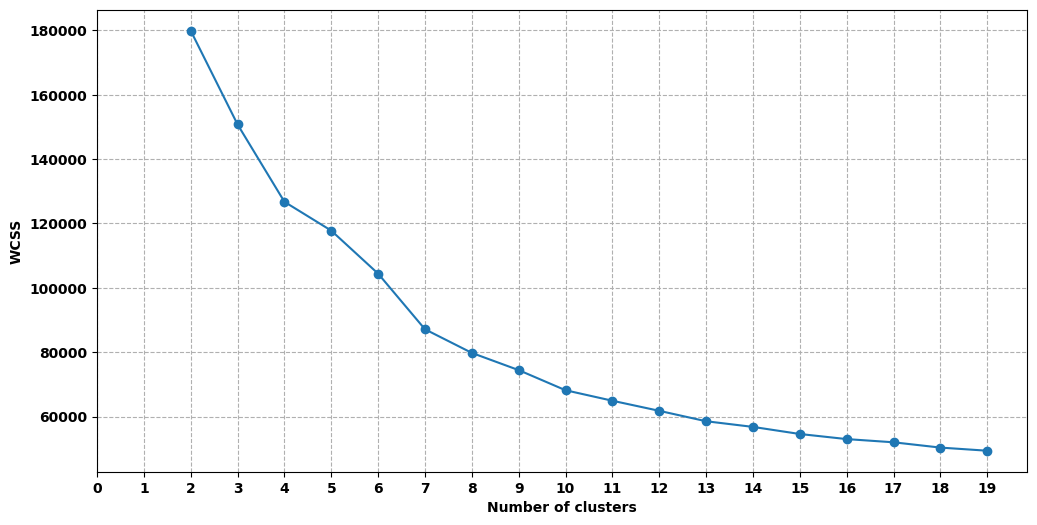

In [5]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(rbs_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette rbs**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


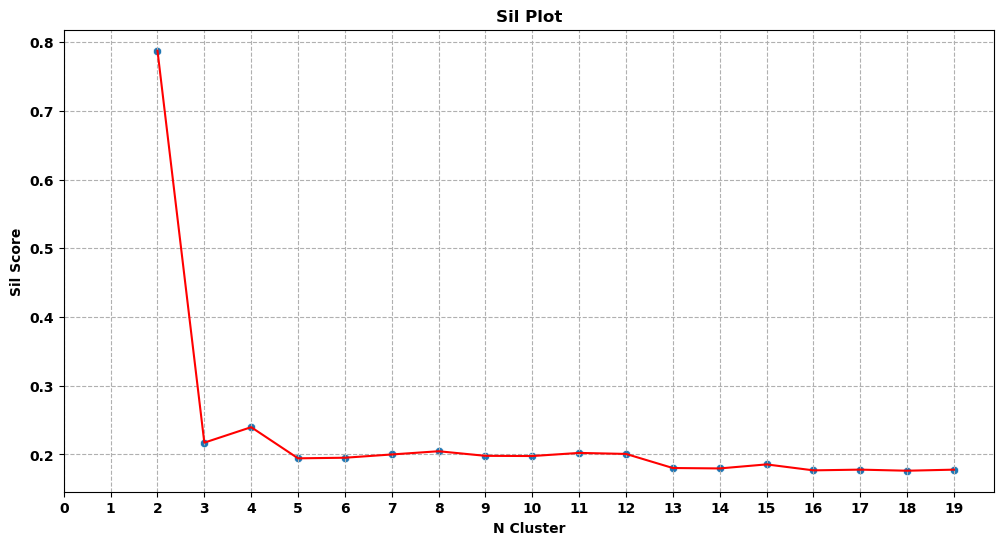

In [6]:
from sklearn.metrics import silhouette_score
df =rbs_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**PCA rbs**

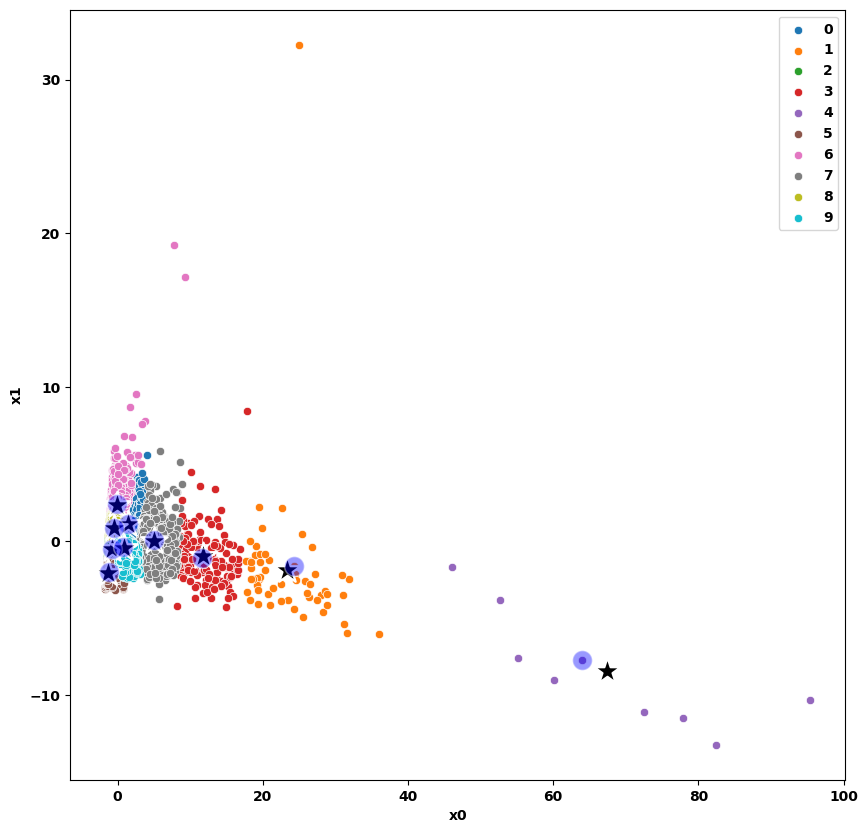

In [7]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(rbs_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**L2 norm**

In [8]:
l2_data_scaled = preprocessing.normalize(total_df, norm='l2')
l2_data_scaled = pd.DataFrame(l2_data_scaled, columns = total_df.columns)

**elbow l2**

within cluster sum of squared distance for k=2:  790.4628793056812
within cluster sum of squared distance for k=3:  356.2597667471943
within cluster sum of squared distance for k=4:  209.5845124184421
within cluster sum of squared distance for k=5:  140.5587178823387
within cluster sum of squared distance for k=6:  104.64306671625017
within cluster sum of squared distance for k=7:  81.5016055418628
within cluster sum of squared distance for k=8:  65.37510299977106
within cluster sum of squared distance for k=9:  52.214844693375035
within cluster sum of squared distance for k=10:  41.47919673431547
within cluster sum of squared distance for k=11:  33.84256980955505
within cluster sum of squared distance for k=12:  28.62713093315565
within cluster sum of squared distance for k=13:  24.676218493367035
within cluster sum of squared distance for k=14:  21.102685762955574
within cluster sum of squared distance for k=15:  18.666009515949852
within cluster sum of squared distance for k=16:  16

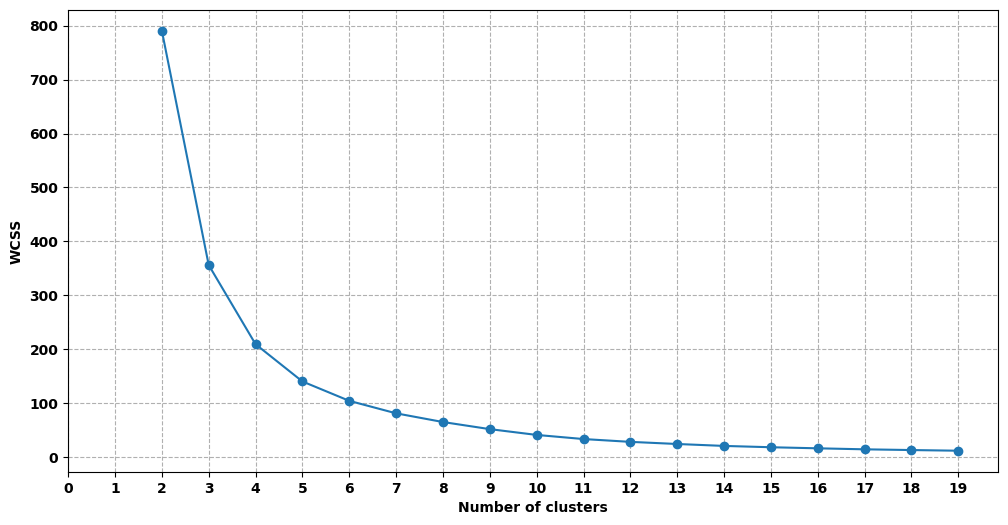

In [9]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(l2_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette l2**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


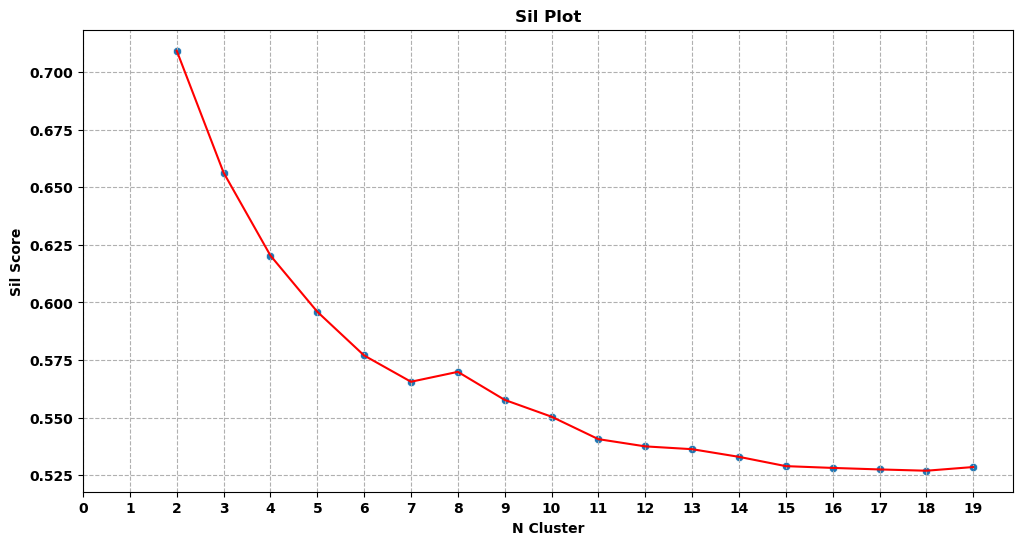

In [10]:
from sklearn.metrics import silhouette_score
df =l2_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

<p dir=rtl style="direction: rtl;text-align justify;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
این جا براساس شکستگی sil و elbow  و در رسم نمودار بعدی از آن استفاده می کنیم مقادیر 5 یا 6 مناسب است که ما مقدار 6 رو انتخاب میکنیم
</p>

**Pca l2**

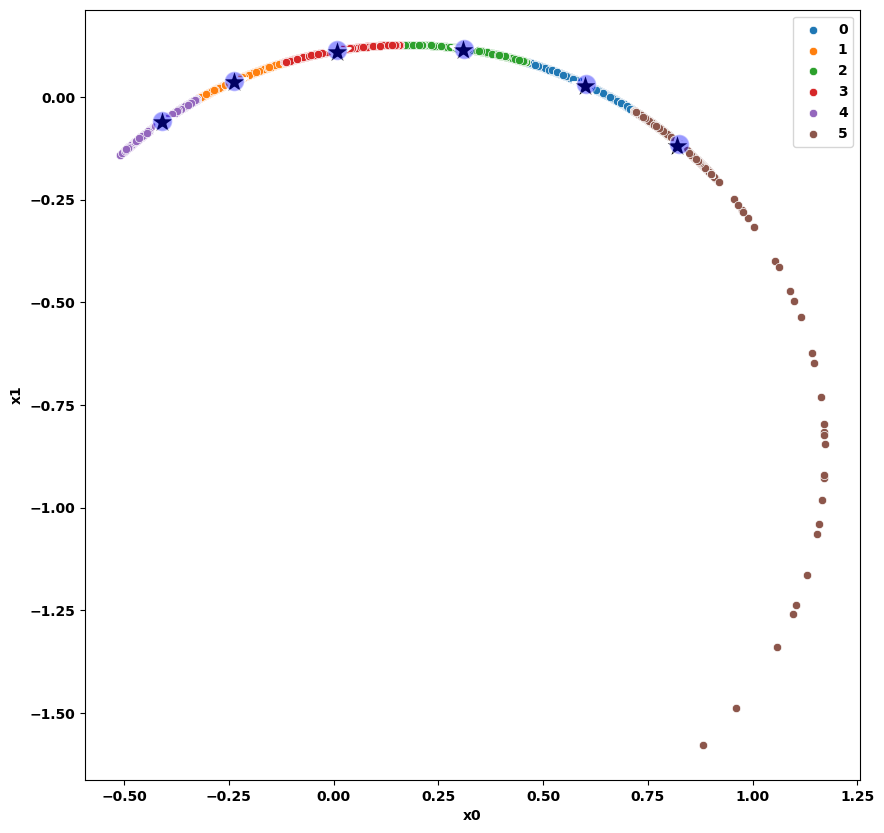

In [11]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(l2_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 6,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**center l2**

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(l2_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, l2_data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_8804\870627896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([15190,  3226,  3956,  1990, 10133,   957], dtype=int64)

C:\Users\theki\AppData\Local\Temp\ipykernel_8804\4228730169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


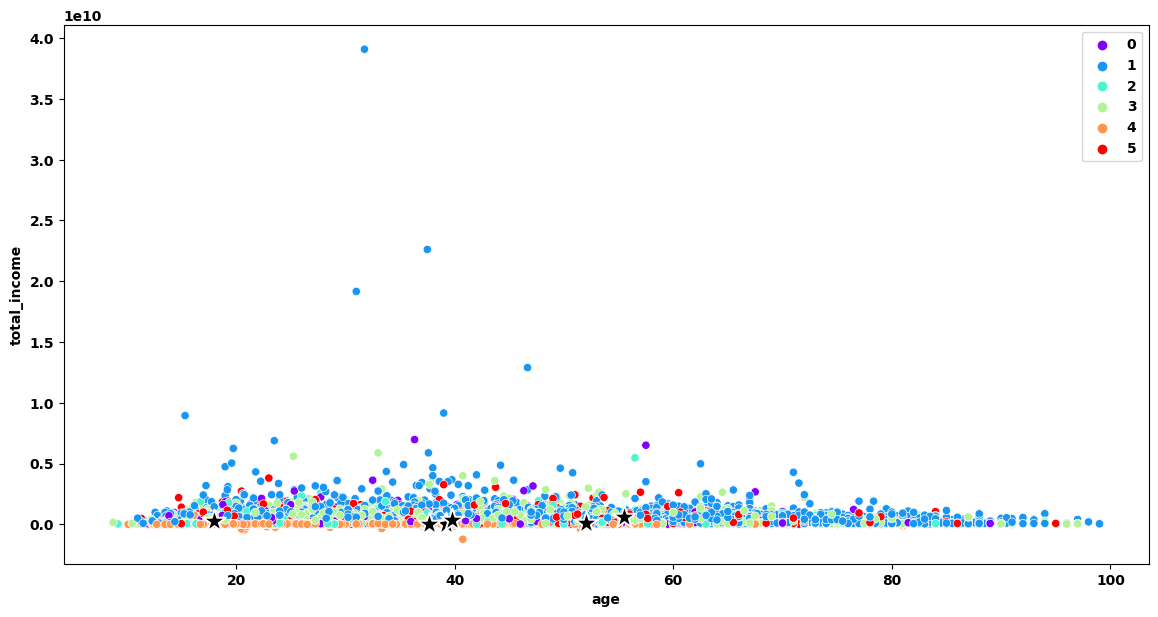

In [13]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(l2_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, l2_data_scaled)


col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center l2 visualize**

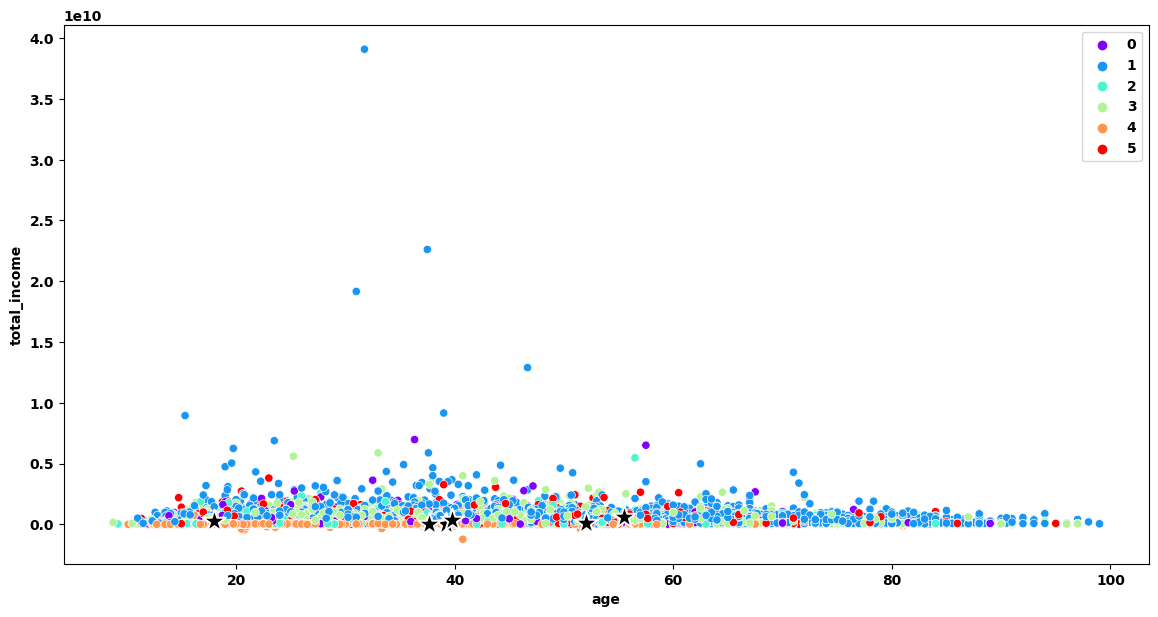

In [14]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center l2 points**

In [15]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
843,2,1,1,55.500000,0.500000,0,1,6,78858776.0,609080000.0,1
4458,4,2,2,39.750000,1.000000,0,1,6,241520000.0,395780000.0,5
16321,4,2,2,18.000000,0.750000,0,1,5,272282000.0,247180000.0,0
154,3,2,1,52.000000,0.333333,0,1,5,41243164.0,128180000.0,3
3956,4,2,2,39.250000,1.000000,0,0,8,110310000.0,49690000.0,2
3226,3,2,1,37.666667,1.000000,0,0,7,255495000.0,31740000.0,4


**MaxAbs scaler**

In [16]:
scaler = MaxAbsScaler()
data_scaled =scaler.fit_transform(total_df)
data_scaled = pd.DataFrame(data_scaled, columns = total_df.columns)


**min_max scaler**

In [17]:
minmax_scaler = MinMaxScaler()
minmax_data_scaled =minmax_scaler.fit_transform(total_df)
minmax_data_scaled = pd.DataFrame(minmax_data_scaled, columns = total_df.columns)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=3>
به نظر میاد احتمالا min_max scaler va MaxAbsScaler بهتر میتونه نقاط شکستگی نمودار elbow و Silhoeute رو نمایش بده
</p>

**elbow min_max**

within cluster sum of squared distance for k=2:  10157.508859629468
within cluster sum of squared distance for k=3:  6675.803782500775
within cluster sum of squared distance for k=4:  5310.263319033922
within cluster sum of squared distance for k=5:  4115.371783265972
within cluster sum of squared distance for k=6:  3847.0669055229323
within cluster sum of squared distance for k=7:  3366.645298486188
within cluster sum of squared distance for k=8:  3134.6873303435705
within cluster sum of squared distance for k=9:  2866.381328288455
within cluster sum of squared distance for k=10:  2714.6176140689363
within cluster sum of squared distance for k=11:  2561.715371812697
within cluster sum of squared distance for k=12:  2408.548648056164
within cluster sum of squared distance for k=13:  2283.9201002669865
within cluster sum of squared distance for k=14:  2212.4127361905275
within cluster sum of squared distance for k=15:  2143.2535163955745
within cluster sum of squared distance for k=16: 

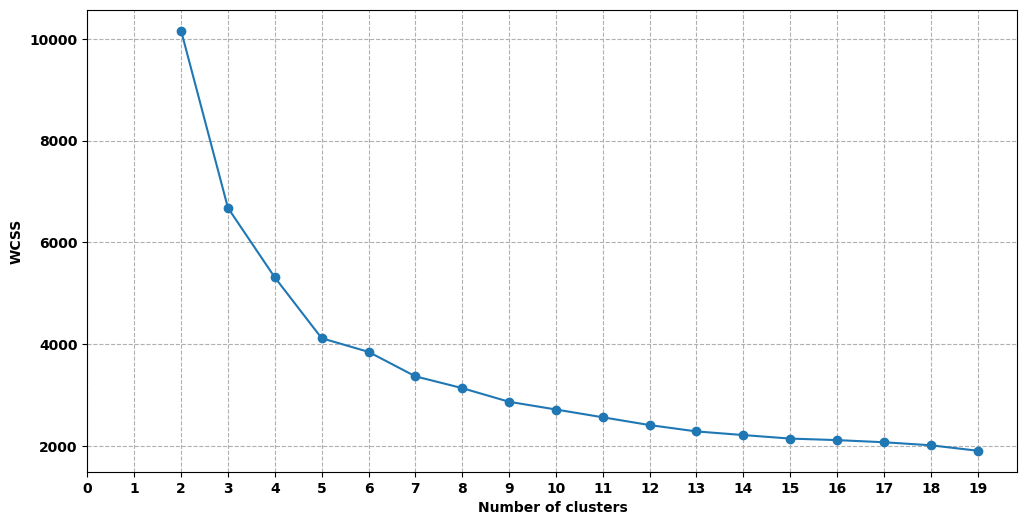

In [18]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(minmax_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette min_max**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


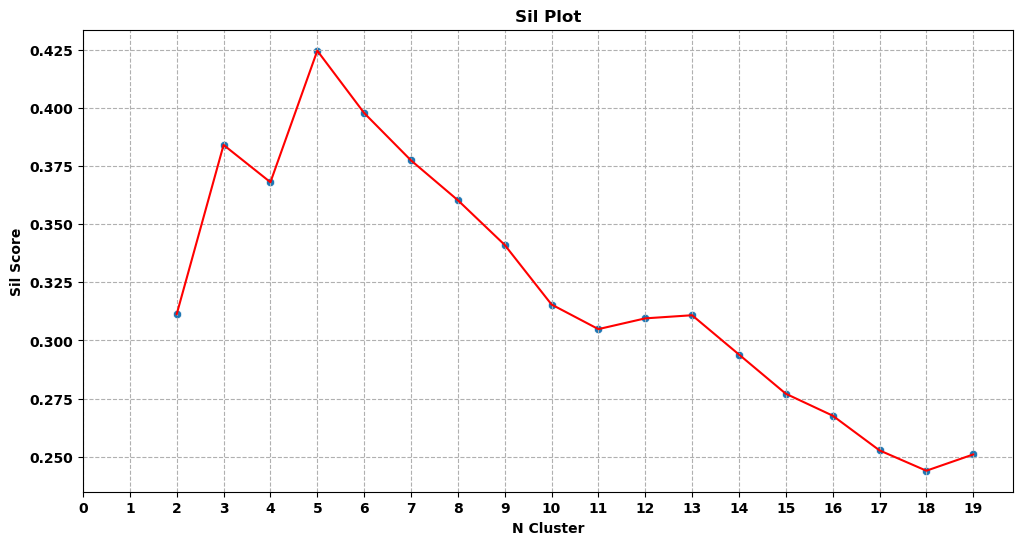

In [19]:
from sklearn.metrics import silhouette_score
df =minmax_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Pca min_max**

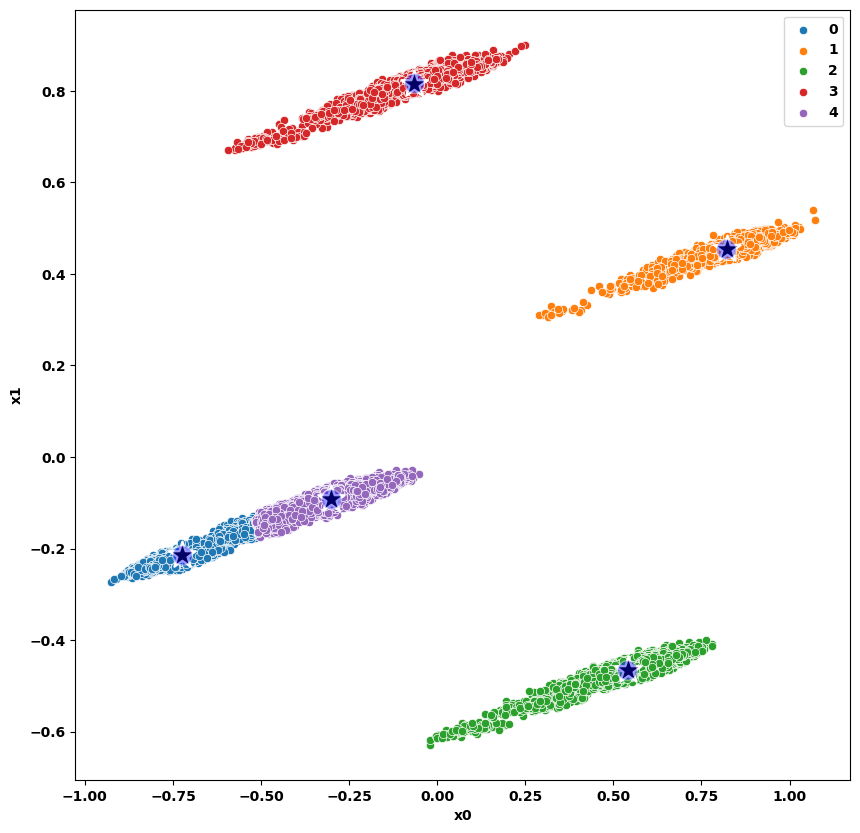

In [20]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(minmax_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**standard scaler**

In [21]:
z_scaler = StandardScaler()
z_data_scaled =z_scaler.fit_transform(total_df)
z_data_scaled = pd.DataFrame(z_data_scaled, columns = total_df.columns)


**elbow standard scaler**

within cluster sum of squared distance for k=2:  157481.8234192535
within cluster sum of squared distance for k=3:  140694.54676798594
within cluster sum of squared distance for k=4:  131062.55882978218
within cluster sum of squared distance for k=5:  123290.8020629203
within cluster sum of squared distance for k=6:  117063.52693198303
within cluster sum of squared distance for k=7:  113516.33989203583
within cluster sum of squared distance for k=8:  109413.09619492725
within cluster sum of squared distance for k=9:  103840.70804303742
within cluster sum of squared distance for k=10:  97710.7855168223
within cluster sum of squared distance for k=11:  95555.9791278623
within cluster sum of squared distance for k=12:  89102.61866338726
within cluster sum of squared distance for k=13:  85712.0656565189
within cluster sum of squared distance for k=14:  83286.55680962966
within cluster sum of squared distance for k=15:  80649.71105235444
within cluster sum of squared distance for k=16:  793

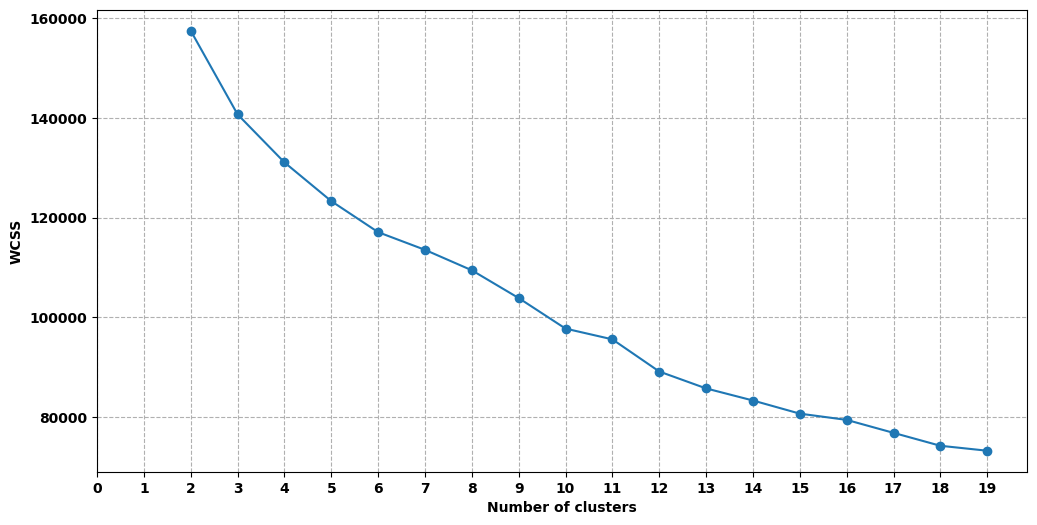

In [22]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(z_data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

k=6 ro mishe ye noghte shekast darnazar gereft ama vaghean moshakhas nist kheily
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
k=6  رو میشه یه نقطه شکست در نظر گرفت اما واقعا مشخص نیست خیلی
</p>

**Silhouette standard scaler**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


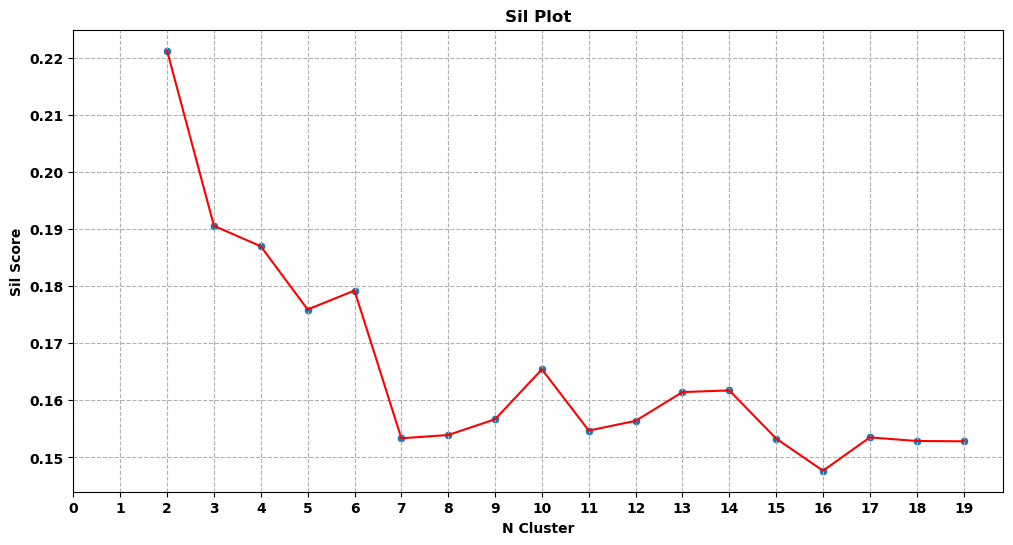

In [23]:
from sklearn.metrics import silhouette_score
df =z_data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

mibinim ke natije Sil plot jaleb nist
<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
k=6  رو میشه یه نقطه شکست در نظر گرفت اما واقعا مشخص نیست خیلی
</p>

**Pca standard scaler**

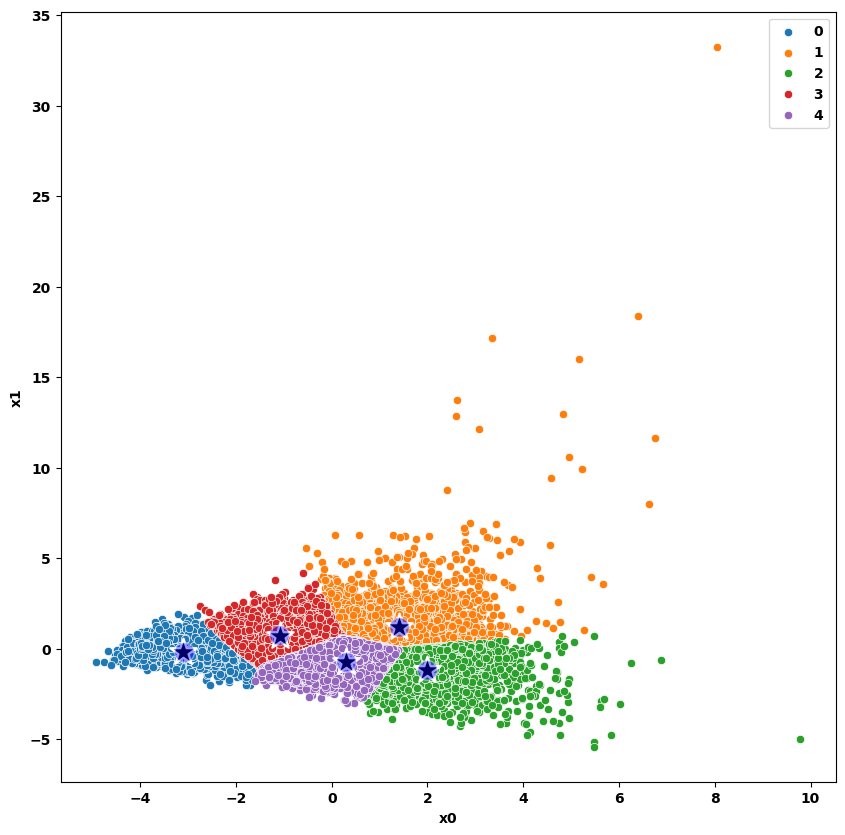

In [24]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(z_data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**center standard scaler visualization**

C:\Users\theki\AppData\Local\Temp\ipykernel_8804\224913684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


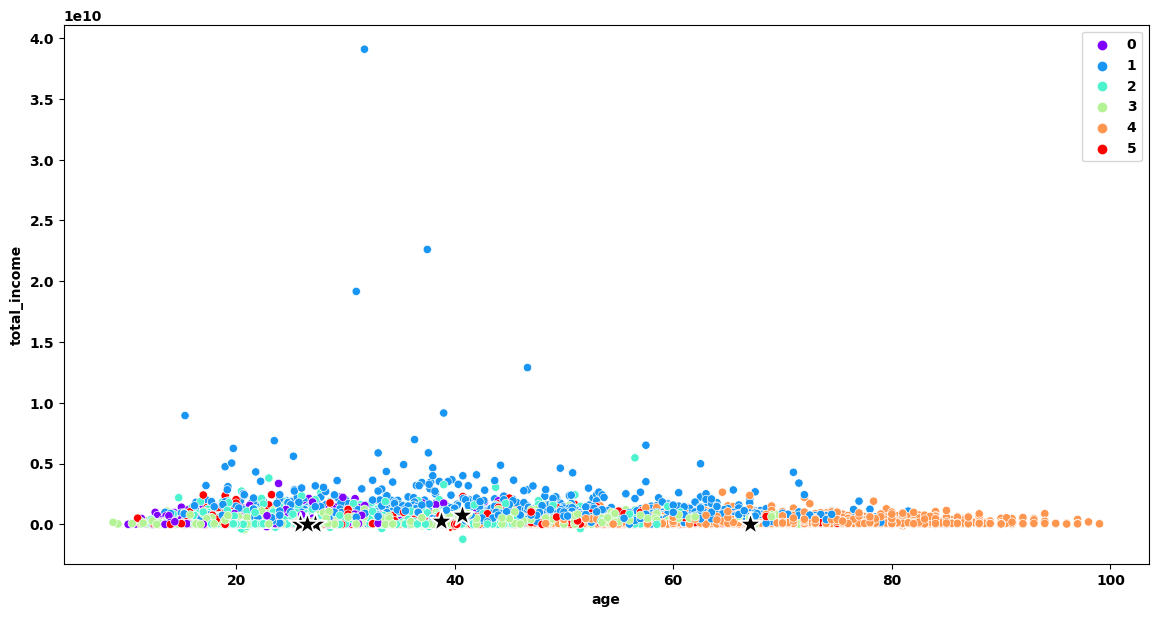

In [25]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++").fit(z_data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, z_data_scaled)


col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**center standard scaler points**

In [26]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
18219,3,2,1,40.666667,1.000000,1,0,6,155421500.0,761380000.0,1
2846,4,2,2,38.750000,0.750000,0,1,6,72807552.0,276980000.0,5
9057,6,3,3,25.833333,0.666667,0,0,5,134002836.0,65210000.0,0
3784,4,2,2,26.500000,0.750000,0,0,5,145868000.0,42480000.0,3
7312,4,2,2,27.250000,0.750000,1,0,7,345682000.0,42280000.0,2
7946,2,1,1,67.000000,0.000000,0,0,4,27283776.0,15570000.0,4



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
از نمودار و این خوشه ها نتیجه به این شکل نشون داده میشه
</p>

In [27]:
# data_scaled=total_df

<Axes: >

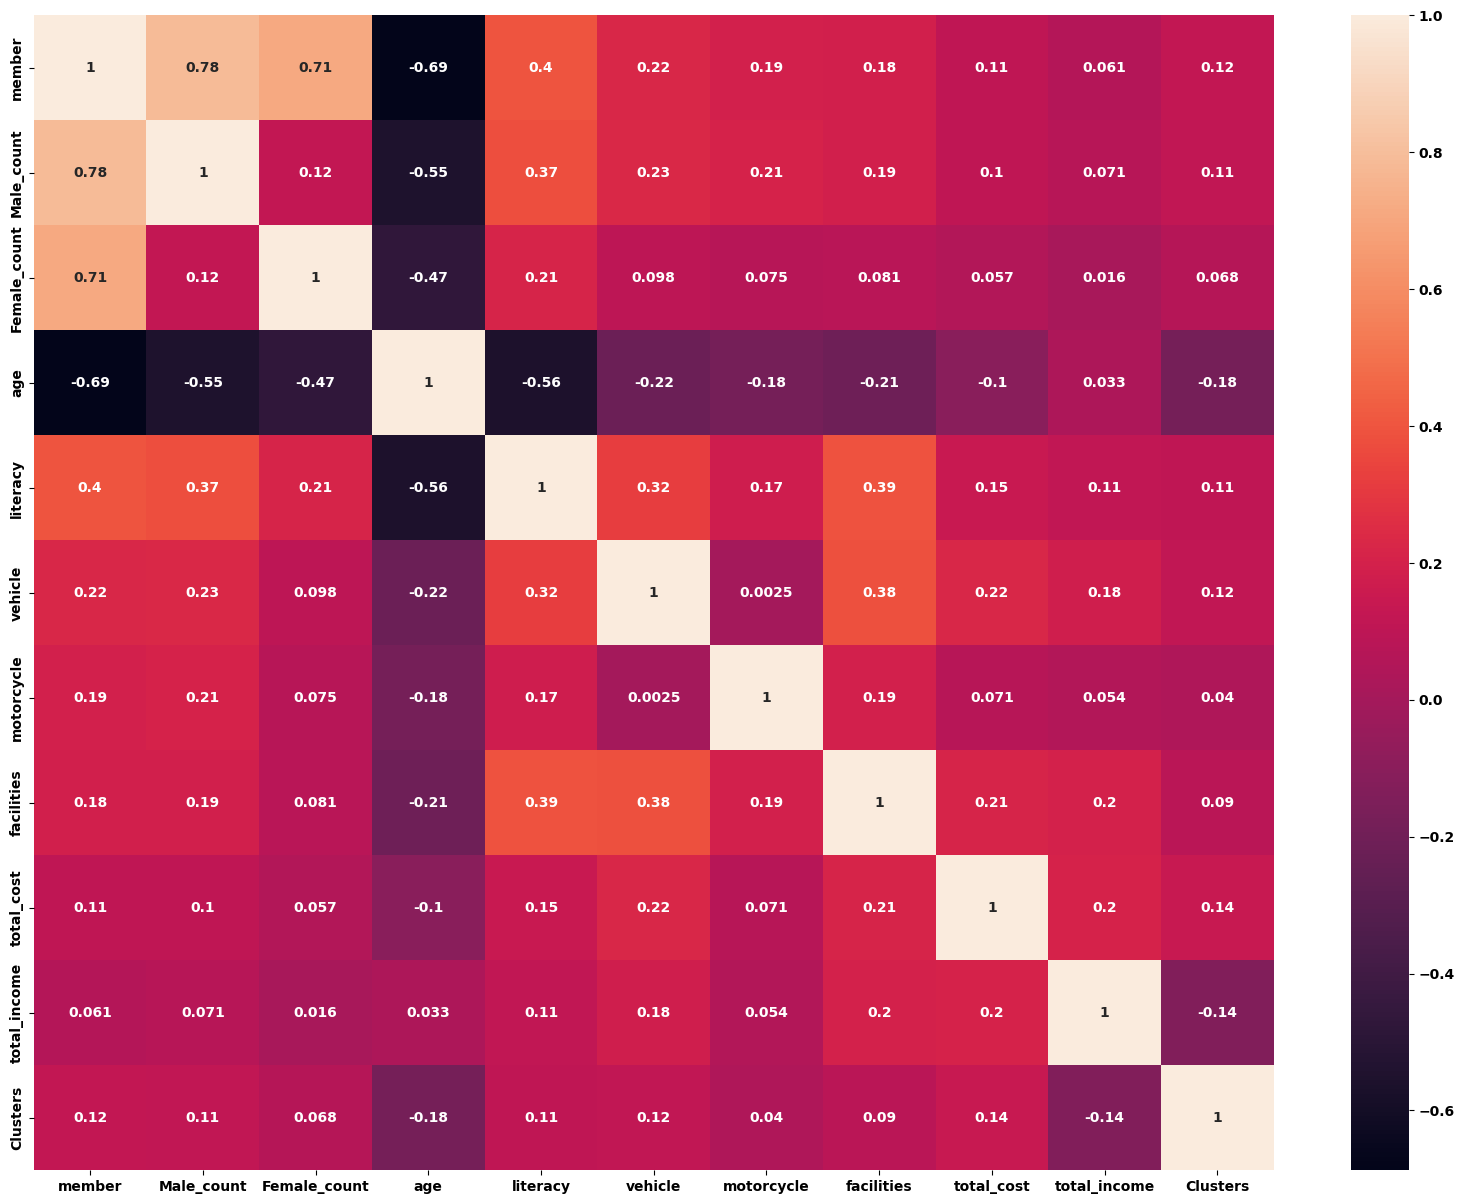

In [28]:
corr = pd.DataFrame(data_scaled).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر سن افراد خانواده بیشتر باشه هزینه هاشون کمتر میشه
</p>

**min_max scaler**

<Axes: >

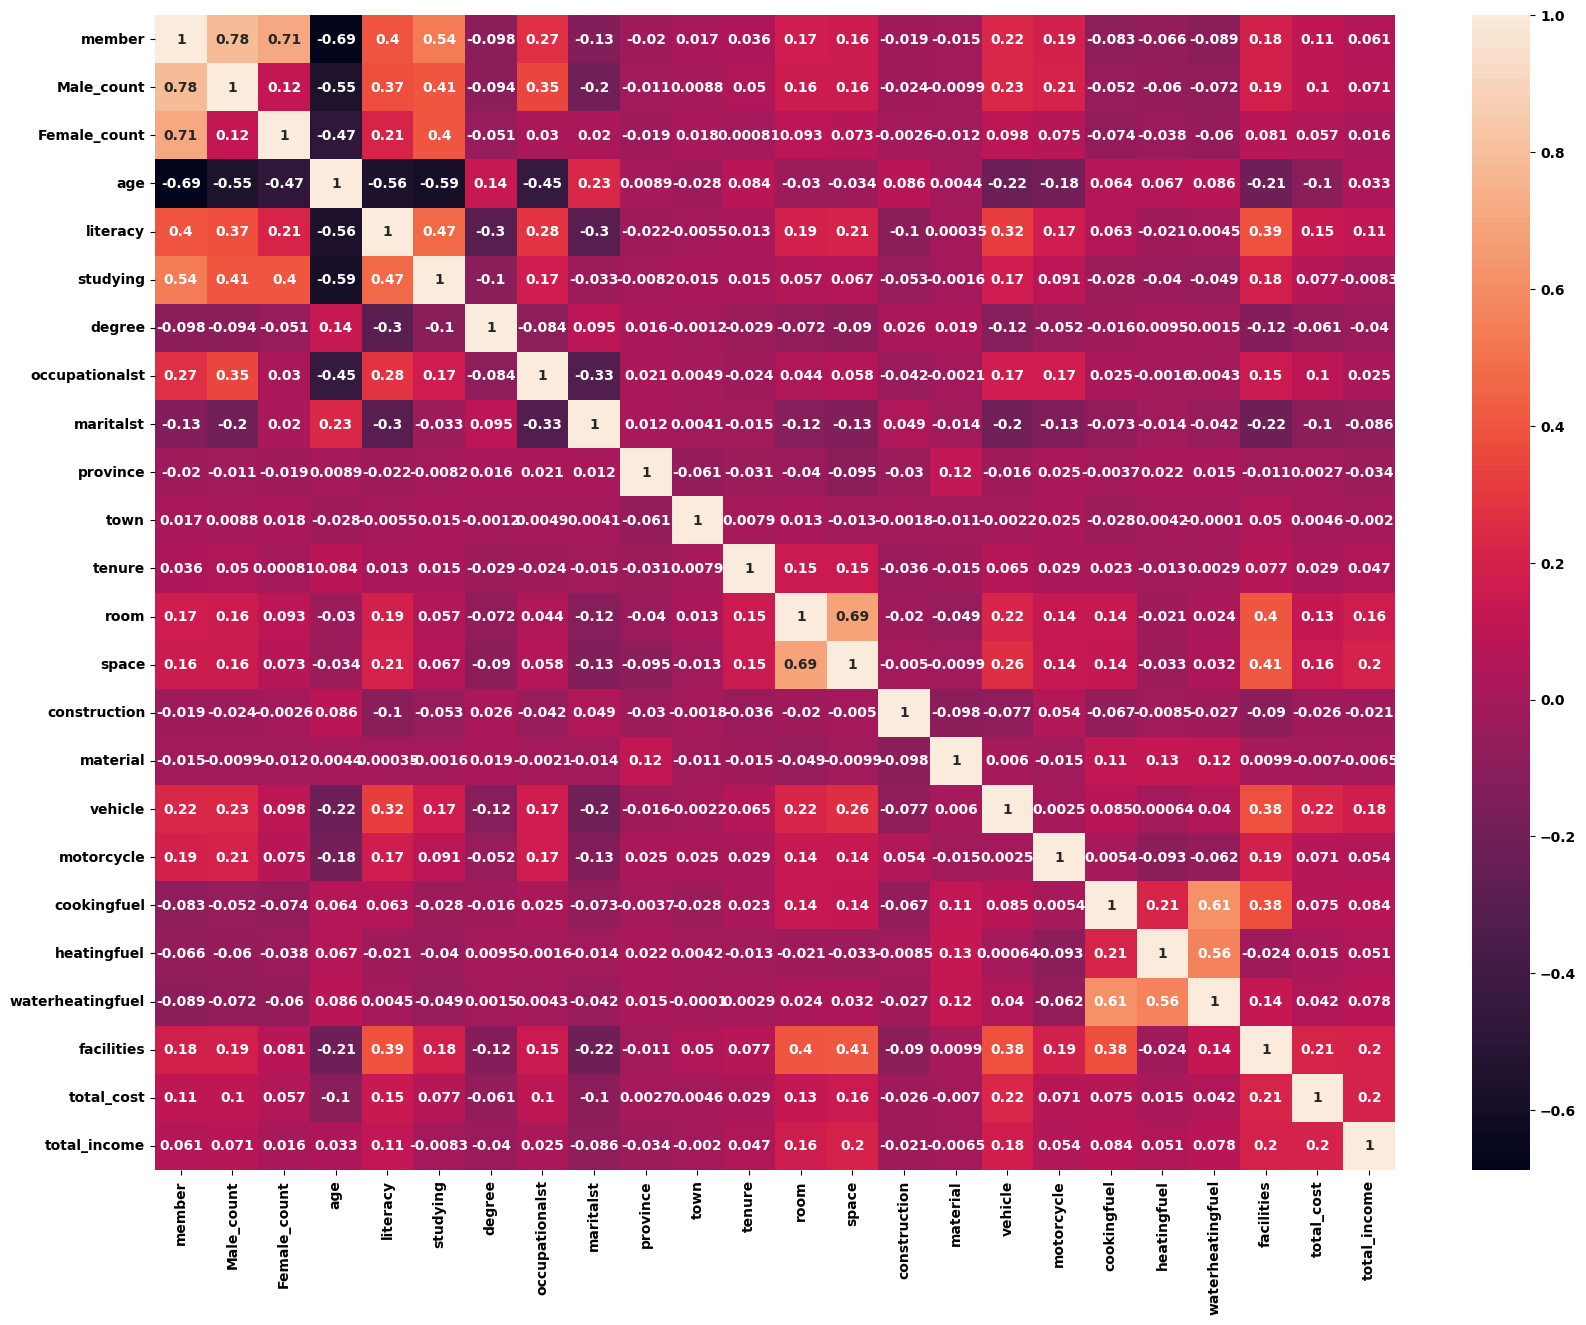

In [29]:
corr = pd.DataFrame(total_df_corr).select_dtypes('number').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
سواد داشتن با میزان ازدواج رابطه عکس داره 0.28 منفی یعنی هر چقدر سواد بره بالا میزان ازدواج تو خانواده کمتر میشه
</p>



<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر female_count  یک خانواده بیشتر باشه تعداد اتاق های منزل هم بیشتر میشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هر چقدر وسیله نقلیه یه خونواده بیشتر باشه هزینه هاشم بیشتر میشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هرچقدر دانش آموز بیشتری داشته باشه یه خانواده امکانات منزلش هم باید بیشتر باشه
</p>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
هر چقدر سن بالاتر بره تو خانواده تعداد اعضای اون خانواده کمتر میشه
</p>

**Clustering after PCA**

In [30]:

# pca = PCA(2)


# df = pca.fit_transform(data_scaled)


# from sklearn.cluster import KMeans

# gmm = GaussianMixture(n_components=5)
# gmm.fit(df)
# # kmeans = KMeans(n_clusters= 6,init="k-means++")

# # label = kmeans.fit_predict(df)
# label = gmm.predict(df)

# u_labels = np.unique(label)

# # closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

# plt.subplots(figsize=(10,10))
# for i in u_labels:
#     sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
# # sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
# # sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

# plt.xlabel('x0')
# plt.ylabel('x1')
# plt.legend()
# plt.show()

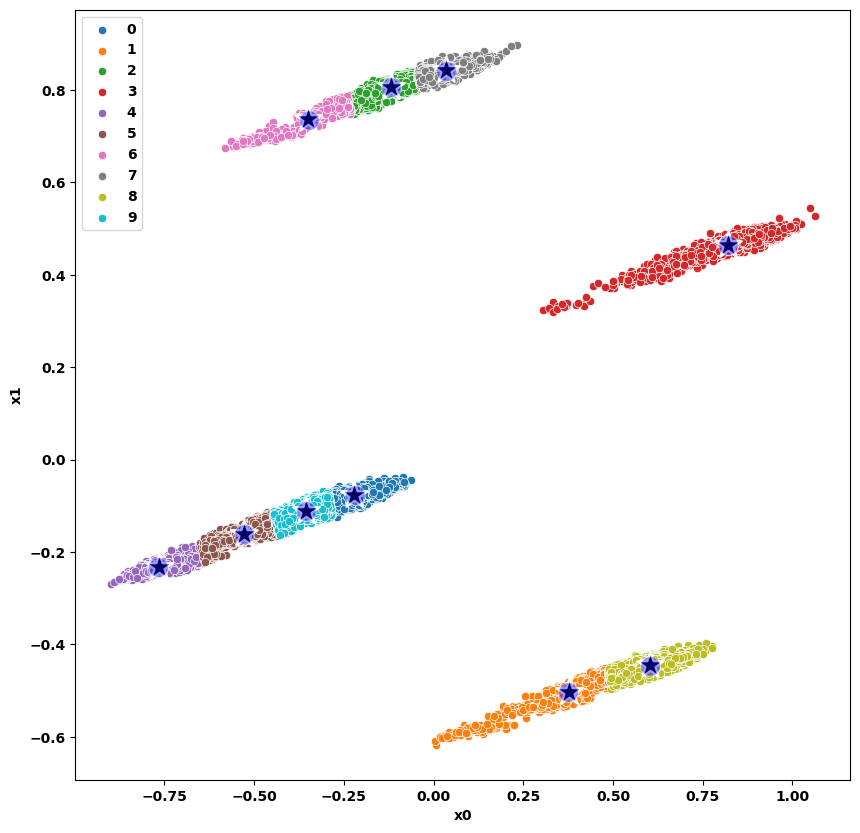

In [31]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import pairwise_distances_argmin_min


pca = PCA(2)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

plt.subplots(figsize=(10,10))
for i in u_labels:
    sns.scatterplot(x=df[label == i , 0] , y=df[label == i , 1] , label = i)
sns.scatterplot(x=kmeans.cluster_centers_[:,0] , y=kmeans.cluster_centers_[:,1] ,s=400, marker="*",color='black')
sns.scatterplot(x=df[closest,0] , y=df[closest,1] ,s=200, marker='o',color='blue',alpha=0.4)

plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

**decision boundary visualization**

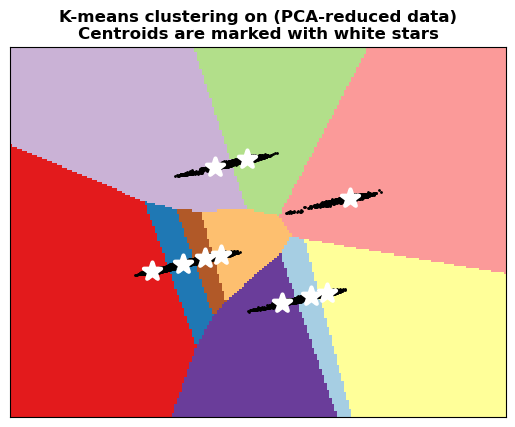

In [32]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='*', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on (PCA-reduced data)\n'
          'Centroids are marked with white stars')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
 

In [33]:
# total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

In [34]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=10,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_8804\3833494303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 8822, 12502,  8408, 11725, 10680,  7312,  1168,  7946,  4504,
       12802], dtype=int64)

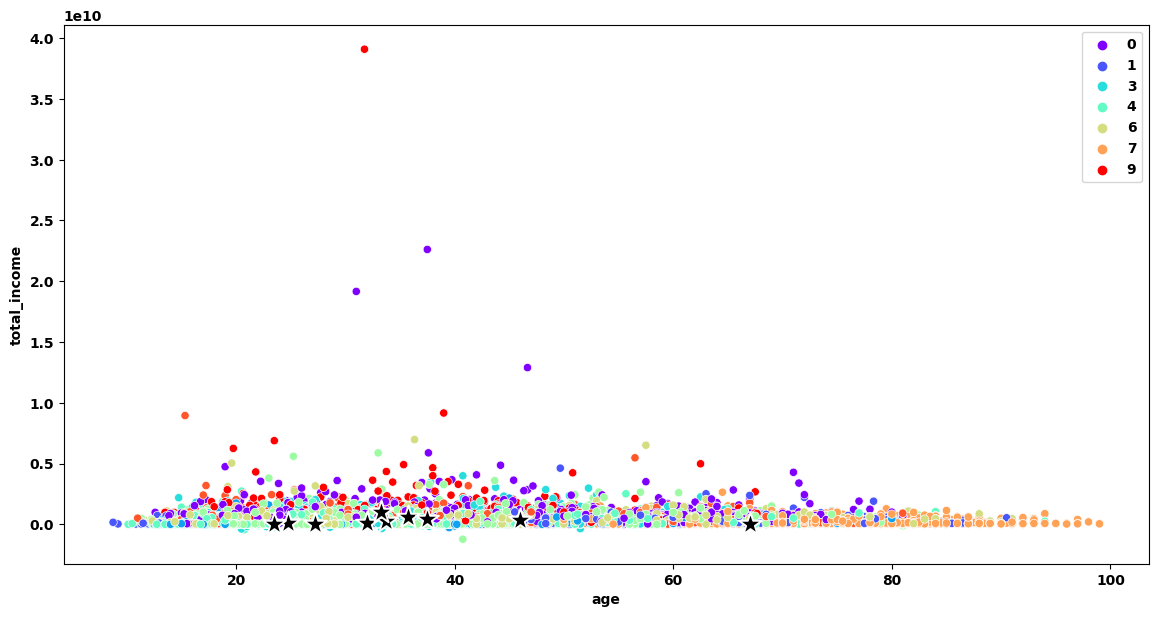

In [35]:

col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

**noghate namayesh dahande marakez har cluster**

In [36]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
12802,4,2,2,33.25,0.75,1,1,7,57539250.0,1.043980e+09,9
8822,4,2,2,35.75,0.75,1,0,6,59385747.0,6.331120e+08,0
4504,4,2,2,37.50,0.75,0,1,6,58733552.0,4.288000e+08,8
12502,4,2,2,46.00,0.50,0,0,5,54020000.0,3.818400e+08,1
1168,4,2,2,33.75,1.00,0,0,6,28375200.0,2.533500e+08,6
11725,4,2,2,24.75,0.75,1,1,7,585121400.0,1.333200e+08,3
8408,4,2,2,32.00,0.75,0,1,5,432772427.0,7.598000e+07,2
10680,4,2,2,23.50,0.75,0,0,5,256036000.0,4.989000e+07,4
7312,4,2,2,27.25,0.75,1,0,7,345682000.0,4.228000e+07,5
7946,2,1,1,67.00,0.00,0,0,4,27283776.0,1.557000e+07,7


**be khanevar haye 1 nafari tavajoh konid ke aghlab hodode 70 sal sen darand**

**WCSS: It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.**

within cluster sum of squared distance for k=2:  9149.077646895546
within cluster sum of squared distance for k=3:  7306.625662631479
within cluster sum of squared distance for k=4:  5217.290040880524
within cluster sum of squared distance for k=5:  4021.040655854137
within cluster sum of squared distance for k=6:  3538.8250495998727
within cluster sum of squared distance for k=7:  3169.615076418386
within cluster sum of squared distance for k=8:  3276.5848698846003
within cluster sum of squared distance for k=9:  2845.9524674968716
within cluster sum of squared distance for k=10:  2577.7013519624115
within cluster sum of squared distance for k=11:  2457.9298076461323
within cluster sum of squared distance for k=12:  2330.0318597860305
within cluster sum of squared distance for k=13:  2203.3865378648957
within cluster sum of squared distance for k=14:  2151.0196692773534
within cluster sum of squared distance for k=15:  2105.1603839770314
within cluster sum of squared distance for k=16

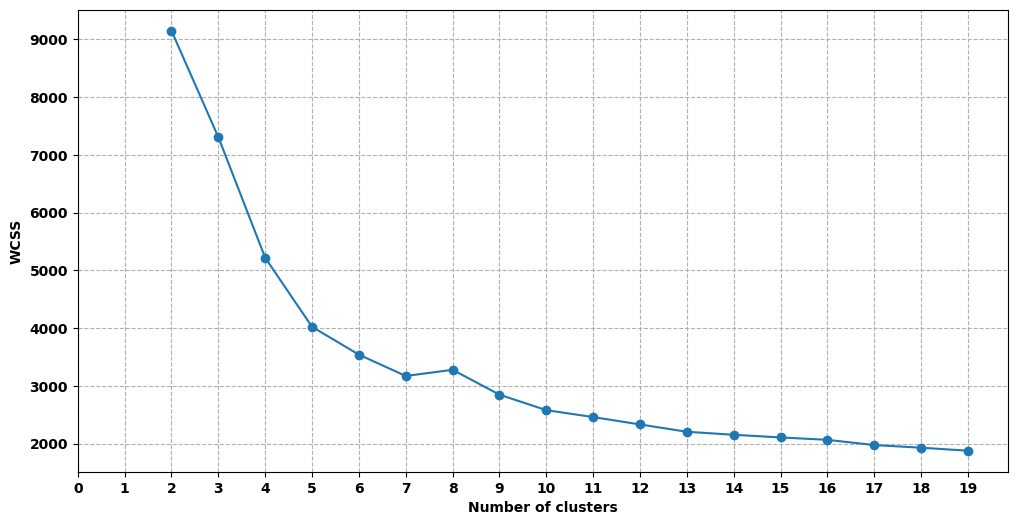

In [37]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    print(f'within cluster sum of squared distance for k={cluster}: ',kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig,ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xticks(range(0,20))
ax.grid(True, linestyle='--')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
plt.show()

**Silhouette: The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).**

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


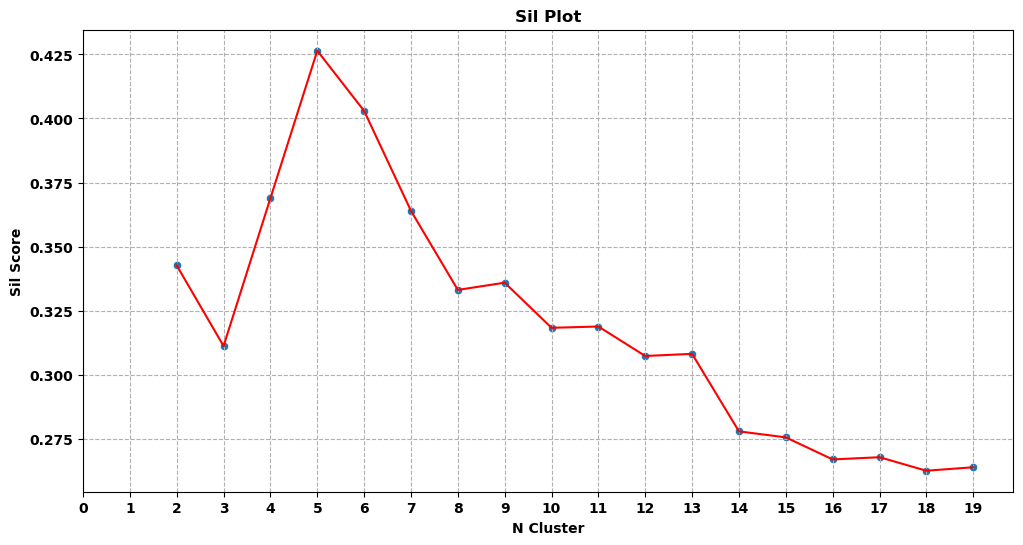

In [38]:

from sklearn.metrics import silhouette_score
df =data_scaled
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.grid(True, linestyle='--')
# axis.set_xticks(range(0,20))
# axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

**Silhouette Visualizer**

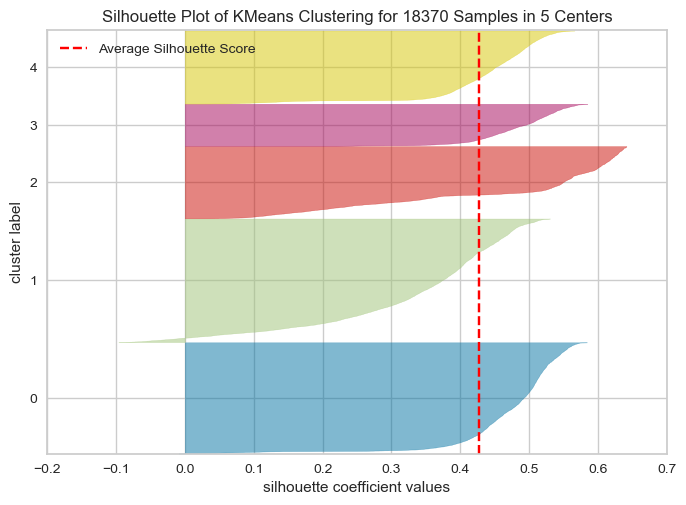

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 18370 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(5,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()    

<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
در این نمایش از Sil درواقع خط چین قرمز میانگین Sil میباشد که اولا هر چه این مقدار به 1 نزدیک تر باشد خوشه های بهتری داریم ثانیا سایزخوشه ها هم باید تقریبا یکسان باشد مثلا در مثال بالا اگر k=6 میشد مقدار sil  به کمتر از 0.5 کاهش میافت و سایز خوشه ها کوچک و بزرگ میشد بنابراین بهترین مقدار برای k همین 5 است.
</p>

**Decision Boundary**

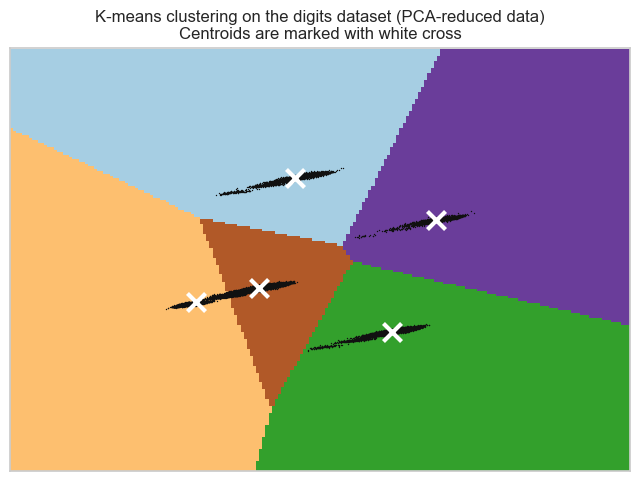

In [40]:
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [41]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=5,init="k-means++").fit(data_scaled)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data_scaled)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_8804\1020581960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 7946,  3948, 10676,  6482,  8667], dtype=int64)

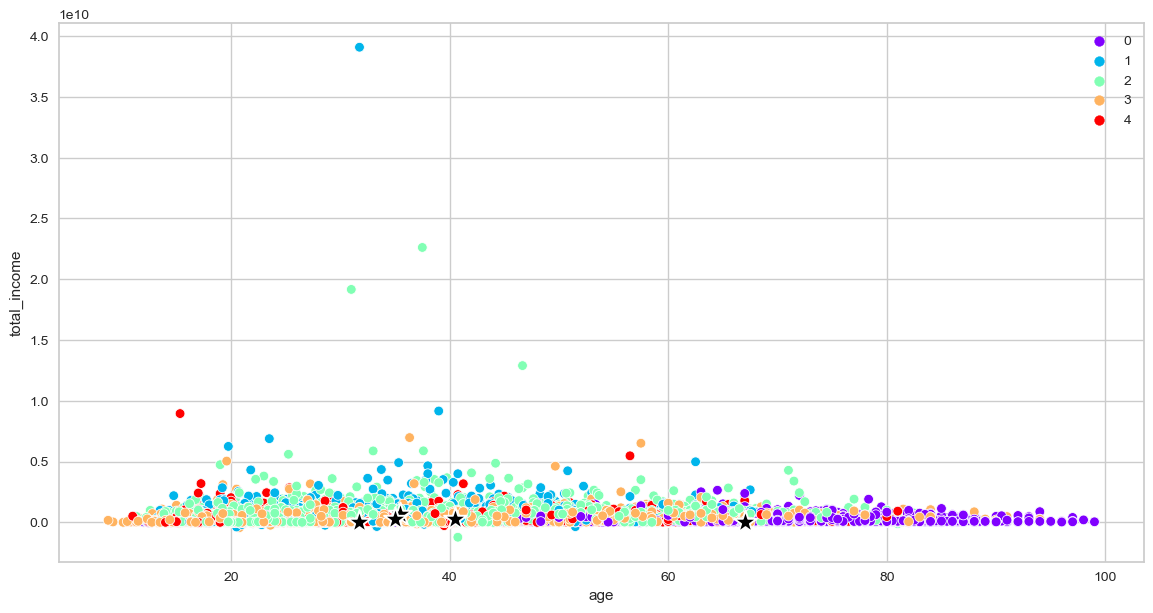

In [42]:
col0='age'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()

In [43]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
3948,4,2,2,35.50,0.75,1,1,7,228295000.0,651900000.0,1
6482,4,2,2,40.50,0.75,0,0,5,485589152.0,263350000.0,3
10676,4,2,2,35.00,0.75,1,0,6,98351552.0,249530000.0,2
8667,4,2,2,31.75,0.75,0,1,5,164057710.0,52080000.0,4
7946,2,1,1,67.00,0.00,0,0,4,27283776.0,15570000.0,0


<b><p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
تلاش هایی برای نمایش بهتر شکست در دونمودار Sil و elbow  برای یافتن بهترین مقدار k
</p></b>


<p dir=rtl style="direction: rtl;text-align: center;line-height:200%;font-family:vazir;font-size:medium;color:#0099cc">
<font face="vazir" size=4>
pca اگر اسکیل داده ها نامناسب باشد کمک خاصی به بهتر شدن نمودار elbow ,Silhouette نمی کند
</p>

**pca for finding k**

In [44]:
pca = PCA(5)


df = pca.fit_transform(data_scaled)


from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters= 10,init="k-means++")

label = kmeans.fit_predict(df)

u_labels = np.unique(label)

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)

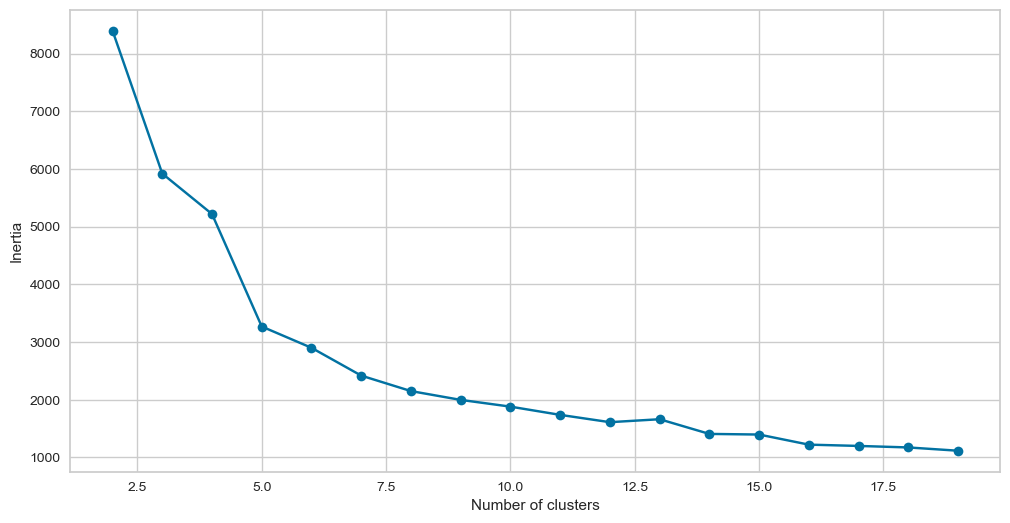

In [45]:
%matplotlib inline
SSE = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
fig, ax = plt.subplots(figsize=(12,6))
frame = pd.DataFrame({'Cluster':range(2,20), 'SSE':SSE})
ax.plot(frame['Cluster'], frame['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
plt.show()

d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\envs\quera\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


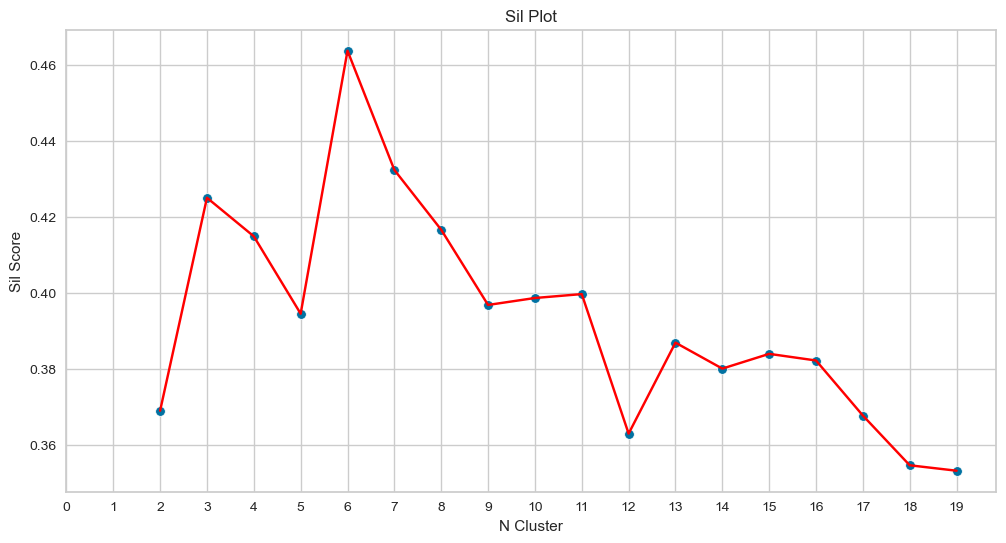

In [46]:
from sklearn.metrics import silhouette_score
sil=[]
n_cluster=range(2,20)

for i in n_cluster:
    kmean=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmean.fit(df)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
fig,axis=plt.subplots(figsize=(12,6))
sns.scatterplot(x=n_cluster,y=sil,ax=axis)
sns.lineplot(x=n_cluster,y=sil,color = 'red',ax=axis)
axis.set_xticks(range(0,20))
axis.set_xticklabels(range(0,20))
axis.set(title="Sil Plot")
axis.set_xlabel('N Cluster')
axis.set_ylabel('Sil Score')
plt.show()

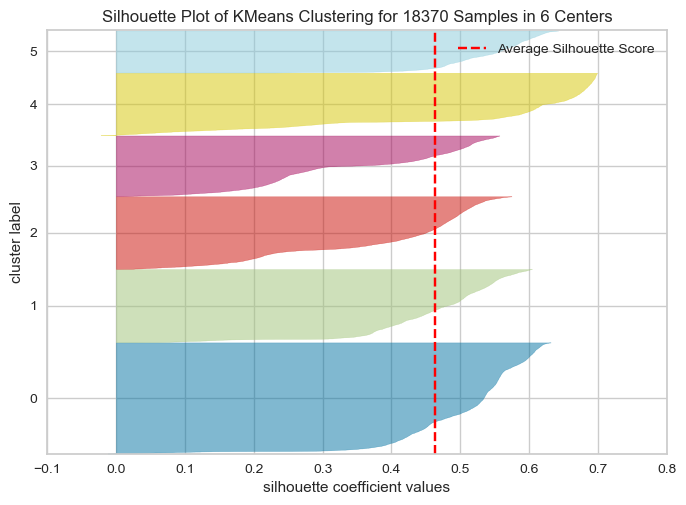

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 18370 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6,random_state=42,init='k-means++')
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()    

In [48]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
km = KMeans(n_clusters=6,init="k-means++",random_state=42).fit(df)
total_df['Clusters'] =km.labels_
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, df)
closest

C:\Users\theki\AppData\Local\Temp\ipykernel_8804\3092095364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Clusters'] =km.labels_


array([ 9588,  4092, 10279,  9085,  3270,  3446], dtype=int64)

In [49]:
total_df.iloc[closest].sort_values(by=['total_income'],ascending=False)

,member,Male_count,Female_count,age,literacy,vehicle,motorcycle,facilities,total_cost,total_income,Clusters
10279,5,2,3,47.000000,0.800000,0,0,5,117210940.0,803100000.0,2
9588,5,1,4,36.800000,0.800000,1,0,7,296740000.0,674028000.0,0
3446,5,1,4,30.800000,0.800000,1,1,9,136765000.0,528000000.0,5
3270,2,1,1,67.500000,0.000000,0,0,6,354955000.0,221720000.0,4
9085,4,3,1,37.750000,0.750000,0,0,5,186853116.0,42280000.0,3
4092,3,1,2,21.666667,0.666667,0,1,8,80008776.0,23280000.0,1


In [50]:
total_df.loc[total_df.Clusters == 5, ].age.mean()

33.496477886456034

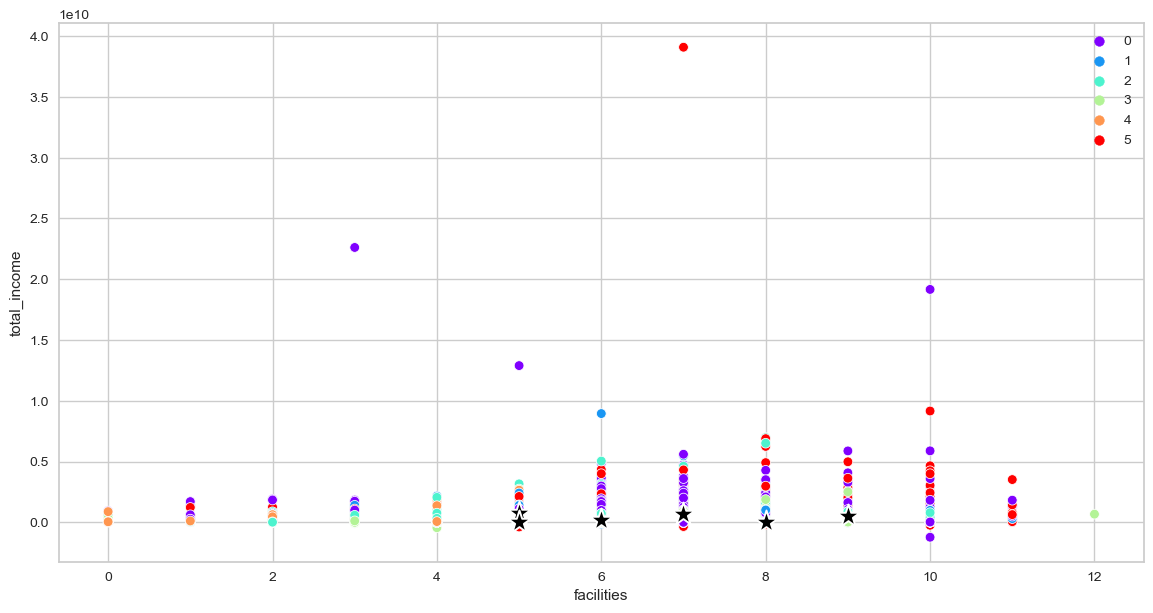

In [51]:
col0='facilities'
col1 = 'total_income'
plt.figure(figsize=(14,7))
# sns.set(rc={'xtick.labelsize':17,'ytick.labelsize':10,'axes.labelsize':15 , "axes.grid":True})
# custom_palette = sns.color_palette("rainbow", 6)
sns.scatterplot(x=col0,y=col1,hue=total_df['Clusters'],data=total_df,palette='rainbow')
sns.scatterplot(x=total_df.iloc[closest][col0],y=total_df.iloc[closest][col1],s=300,marker="*",color='black')
plt.show()